In [ ]:
# 소프트맥스 회귀

'''
다중 클래스 분류: 3개 이상의 선택지로부터 1개를 선택
소프트맥스 회귀: 다중 클래스 분류를 풀기위한 알고리즘

소프트맥스 함수
- 각 선택지가 정답일 확률로 표현 
- 확률의 총 합이 1
- 선택지의 개수만큼의 차원을 가지는 벡터를 만들고, 해당 벡터가 벡터의 모든 원소의 합이 1이 되도록 원소들의 값을 변환

즉, 
선형회귀의 가설은 H(x) = Wx+b, 
로지스틱 회귀의 가설은 H(x) = sigmoid(Wx+b) 0~1사이의 하나의 값으로 표현,
소프트맥스 회귀의 가설은 H(x) = softmax(Wx+b)

소프트맥스 회귀에서는 실제값을 원-핫 벡터로 표현
원-핫 인코딩은 선택해야 하는 선택지의 개수만큼의 차원을 가지면서, 
각 선택지의 인덱스에 해당하는 원소에는 1, 
나머지 원소는 0의 값을 가지도록 하는 표현 방법

비용함수 - cross entropy 함수
cross entropy = -(y1log(p1)+y2log(p2)+y3log(y3)+ ...)
'''

In [5]:
# cross entropy 함수 구현

import torch
import torch.nn.functional as F

torch.manual_seed(1)

# 3개의 원소를 가진 벡터 텐서를 정의
z = torch.FloatTensor([1, 2, 3])

# 소프트맥스 함수
hypothesis = F.softmax(z, dim=0)
print(hypothesis)
# 원소의 값이 0과 1사이의 값을 가지는 벡터로 변환됨

# 원소들의 값의 합이 1인지 확인
print(hypothesis.sum())


tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [4]:
# 소프트맥스 함수 - 직접 구현
# torch.log(F.softmax(z, dim=1))

# 각 샘플에 대해서 소프트맥스 함수를 적용
z = torch.rand(3, 5, requires_grad=True)
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

# 각 샘플에 대해서 임의의 레이블을 만들기
y = torch.randint(5, (3,)).long()
print(y)

# 각 레이블에 대해서 원-핫 인코딩을 수행
y_one_hot = torch.zeros_like(hypothesis) # 모든 원소가 0의 값을 가진 3 × 5 텐서 생성
y_one_hot.scatter_(1, y.unsqueeze(1), 1)
print(y_one_hot)

# 소프트맥스 회귀의 비용 함수 계산
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor([[0.2974, 0.2244, 0.1595, 0.1420, 0.1767],
        [0.1509, 0.1595, 0.1917, 0.2522, 0.2457],
        [0.1002, 0.2226, 0.1878, 0.2624, 0.2271]], grad_fn=<SoftmaxBackward>)
tensor([3, 2, 3])
tensor([[0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]])
tensor(1.6471, grad_fn=<MeanBackward0>)


In [7]:
# 소프트맥스 회귀

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

# 데이터
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)
print(x_train.shape)
print(y_train.shape)

y_one_hot = torch.zeros(8,3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot)
print(y_one_hot.shape)

# 모델 초기화
W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W,b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    y_pred = F.softmax(x_train.matmul(W) + b, dim=1)
    
    cost = (y_one_hot * -torch.log(y_pred)).sum(dim=1).mean()
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

torch.Size([8, 4])
torch.Size([8])
tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])
torch.Size([8, 3])
Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


In [8]:
# 소프트맥스 회귀 - 함수 사용

'''
위에서는 소프트맥스 함수의 출력값을 로그 함수의 입력으로 사용
torch.log(F.softmax(z, dim=1))
cost = (y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

파이토치에서는 두 개의 함수를 결합한 F.log_softmax()라는 도구를 제공
F.log_softmax(z, dim=1)
cost = (y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

F.nll_loss()를 사용할 때는 원-핫 벡터를 넣을 필요없이 바로 실제값을 인자로 사용
cost = F.nll_loss(F.log_softmax(z, dim=1), y)

F.cross_entropy()는 F.log_softmax()와 F.nll_loss()를 포함
cost = F.cross_entropy(z, y)
'''

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

# 데이터
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)
print(x_train.shape)
print(y_train.shape)

# 모델 초기화
W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W,b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    y_pred = x_train.matmul(W) + b
    
    # F.cross_entropy()는 그 자체로 소프트맥스 함수를 포함
    # 가설에서 소프트맥스 함수를 사용할 필요가 없음
    cost = F.cross_entropy(y_pred, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

torch.Size([8, 4])
torch.Size([8])
Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


In [9]:
# 소프트맥스 회귀 - nn.Module로 구현하기


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

# 데이터
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

# 선형 회귀에서 구현에 사용했던 nn.Linear()를 사용
model = nn.Linear(4,3)  # 4개의 특성을 가지고 3개의 클래스로 분류. input_dim=4, output_dim=3

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573444
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473265
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178
Epoch 1000/1000 Cost: 0.254148


In [10]:
# 소프트맥스 회귀 - 클래스로 구현하기

class SoftmaxRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4,3)
        
    def forward(self, x):
        return self.linear(x)
    
model = SoftmaxRegression()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 2.637636
Epoch  100/1000 Cost: 0.647903
Epoch  200/1000 Cost: 0.564643
Epoch  300/1000 Cost: 0.511043
Epoch  400/1000 Cost: 0.467249
Epoch  500/1000 Cost: 0.428281
Epoch  600/1000 Cost: 0.391924
Epoch  700/1000 Cost: 0.356742
Epoch  800/1000 Cost: 0.321577
Epoch  900/1000 Cost: 0.285617
Epoch 1000/1000 Cost: 0.250818


다음 기기로 학습합니다: cpu
Using downloaded and verified file: MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz
Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw
Using downloaded and verified file: MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz
Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw
Using downloaded and verified file: MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz
Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw


0it [00:00, ?it/s]

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw
Processing...
Done!
Epoch: 0001 cost = 0.535468519
Epoch: 0002 cost = 0.359274209
Epoch: 0003 cost = 0.331187546
Epoch: 0004 cost = 0.316578090
Epoch: 0005 cost = 0.307158172
Epoch: 0006 cost = 0.300180763
Epoch: 0007 cost = 0.295130253
Epoch: 0008 cost = 0.290851533
Epoch: 0009 cost = 0.287417084
Epoch: 0010 cost = 0.284379542
Epoch: 0011 cost = 0.281825215
Epoch: 0012 cost = 0.279800713
Epoch: 0013 cost = 0.277808994
Epoch: 0014 cost = 0.276154310
Epoch: 0015 cost = 0.274440855
Learning finished
Accuracy: 0.8863000273704529
Label:  8
Prediction:  3


C:\Users\Networking_Lab_009\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\Networking_Lab_009\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


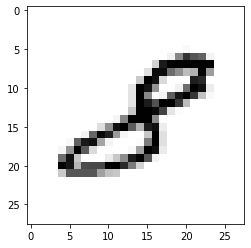

In [13]:
# 소프트맥스 회귀로 MNIST 데이터 분류하기

import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
# hyperparameters
training_epochs = 15
batch_size = 100

# MNIST 데이터셋을 불러오기
mnist_train = dsets.MNIST(root='MNIST_data/',  # 저장할 경로
                          train=True,  # train data 불러오기
                          transform=transforms.ToTensor(),  # 현재 데이터를 파이토치 텐서로 변환
                          download=True)  # 해당 root 경로에 MNIST 데이터가 없다면 다운로드

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# 데이터 미니배치
data_loader = DataLoader(dataset=mnist_train,  # 로드할 대상
                        batch_size=batch_size,   # 배치 크기는 100
                        shuffle = True,  # 매 epoch마다 셔플
                        drop_last = True  # 마지막 배치 버리기 (상대적으로 과대 평가되는 것을 막아줌)
                        )
print(data_loader)

# 모델 설계
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device)  # to()는 연산을 어디서 할지 정함
# bias는 편향 term을 사용할 것인지 정함

# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device)  # # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서
        X = X.view(-1, 28*28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수
        Y = Y.to(device)
        
        y_pred = linear(X)
        cost = criterion(y_pred, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

# 테스트 데이터를 사용하여 모델을 테스트
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않음
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()